### This is Example 4.3. Gambler’s Problem from Sutton's book.

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. 
If the coin comes up heads, he wins as many dollars as he has staked on that flip; 
if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of $100, 
or loses by running out of money. 

On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. 
This problem can be formulated as an undiscounted, episodic, finite MDP. 

The state is the gambler’s capital, s ∈ {1, 2, . . . , 99}.
The actions are stakes, a ∈ {0, 1, . . . , min(s, 100 − s)}. 
The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1.

The state-value function then gives the probability of winning from each state. A policy is a mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. Let p_h denote the probability of the coin coming up heads. If p_h is known, then the entire problem is known and it can be solved, for instance, by value iteration.


In [32]:
import numpy as np
import sys
import matplotlib.pyplot as plt
if "../" not in sys.path:
  sys.path.append("../")


### Exercise 4.9 (programming)

Implement value iteration for the gambler’s problem and solve it for p_h = 0.25 and p_h = 0.55.



In [33]:
# the almost_zero parameter can be defined with a small value to choose different policies
# that have practically no difference in value/return
def value_iteration_for_gamblers(p_h, theta=0.0001, discount_factor=1.0, almost_zero=0.0):
    """
    Args:
        p_h: Probability of the coin coming up heads
    """

    maximum = 100
    nS = maximum + 1
    nA = nS

    def one_step_lookahead(s, V, rewards):
        """
        Helper function to calculate the value for all action in a given state.

        Args:
            s: The gambler’s capital. Integer.
            V: The vector that contains values at each state.
            rewards: The reward vector.

        Returns:
            A vector containing the expected value of each action.
            Its length equals to the number of actions.
        """
        A = np.zeros(nA)

        for a in range(nA):
            # do not allow actions in the terminal states
            if s == 0 or s == maximum:
                continue
            # do not allow the action 0 (stake nothing),
            # especially considering that this is an undisconted MDP
            elif a == 0:
                continue
            # do not allow stake more than the capital, nor more than
            # what remains to reach the maximum capital
            elif a > min(s, maximum-s):
                continue

            prob_win = p_h
            prob_lose = 1.0 - prob_win

            sp_win = s + a
            sp_lose = s - a

            for prob, next_state in [(prob_win, sp_win), (prob_lose, sp_lose)]:
                reward = rewards[next_state]
                A[a] += prob * (reward + discount_factor * V[next_state])

        return A

    # Implement!
    V = np.zeros(nS)
    rewards = np.zeros(nS)
    rewards[maximum] = 1

    while True:
        delta = 0

        for s in range(nS):
            A = one_step_lookahead(s, V, rewards)
            best_value = np.max(A)
            delta = max(delta, abs(V[s] - best_value))
            V[s] = best_value

        if delta < theta:
            break

    policy = np.zeros((nS, nA))

    for s in range(nS):
        A = one_step_lookahead(s, V, rewards)

        best_a = -1

        for a in range(nA):
            if best_a == -1 or A[a] + almost_zero > A[best_a]:
                best_a = a

        best_a = best_a if A[best_a] > 0 else 0

        policy[s][best_a] = 1

    return policy, V

In [34]:
policy, v = value_iteration_for_gamblers(0.25)

print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(v)
print("")

Optimized Policy:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]

Optimized Value Function:
[0.00000000e+00 7.24792480e-05 2.89916992e-04 6.95257448e-04
 1.16010383e-03 1.76906586e-03 2.78102979e-03 4.03504074e-03
 4.66214120e-03 5.59997559e-03 7.08471239e-03 9.03964043e-03
 1.11241192e-02 1.56793594e-02 1.61464431e-02 1.69517994e-02
 1.86512806e-02 1.98249817e-02 2.24047303e-02 2.73845196e-02
 2.83388495e-02 3.04937363e-02 3.61633897e-02 3.84953022e-02
 4.44964767e-02 6.25000000e-02 6.27174377e-02 6.33700779e-02
 6.45857723e-02 6.59966059e-02 6.78135343e-02 7.08430894e-02
 7.46098323e-02 7.64884604e-02 7.93035477e-02 8.37541372e-02
 8.96225423e-02 9.58723575e-02 1.09538078e-01 1.10939329e-01
 1.13360151e-01 1.18457374e-01 1.21977661e-01 1.29716907e-01
 1.44653559e-01 1.47520113e-01 1.53983246e-01 1.70990169e-01
 1.77987434e-01 1.95990576e-01 2.50000000e-01 2.50217438e-01
 2.508

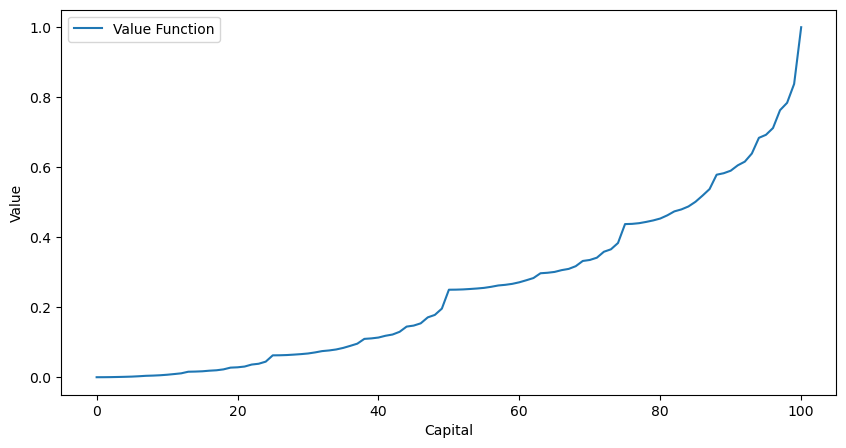

In [35]:
# Plotting Final Values (action stake) vs State (Capital)
# normalize the value with 1 at the end (to make the graph continuous)
v_norm = [0] + list(v[1:100]) + [1]
plt.figure(figsize=(10, 5))
plt.plot(v_norm, label="Value Function")
plt.xlabel("Capital")
plt.ylabel("Value")
plt.legend()

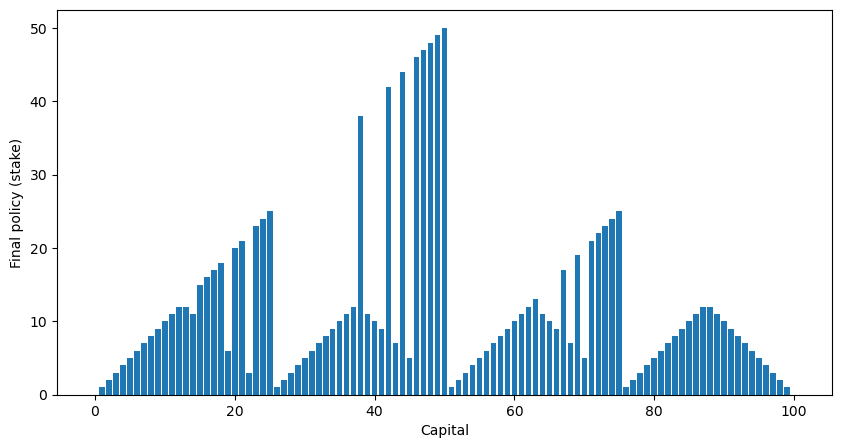

In [36]:
# Plotting Capital vs Final Policy
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(policy)), np.argmax(policy, axis=1))
plt.xlabel("Capital")
plt.ylabel("Final policy (stake)")
plt.show()

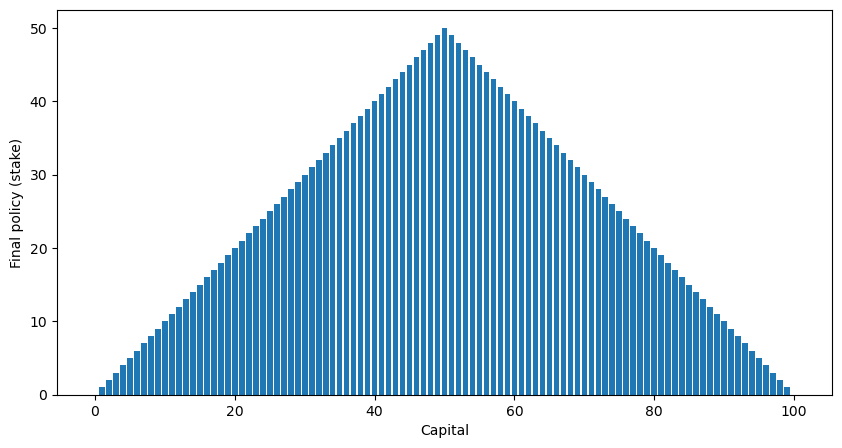

In [37]:
# prefer bigger stakes, when there's practically no difference in value/return
policy, v = value_iteration_for_gamblers(0.25, almost_zero=1e-5)
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(policy)), np.argmax(policy, axis=1))
plt.xlabel("Capital")
plt.ylabel("Final policy (stake)")
plt.show()

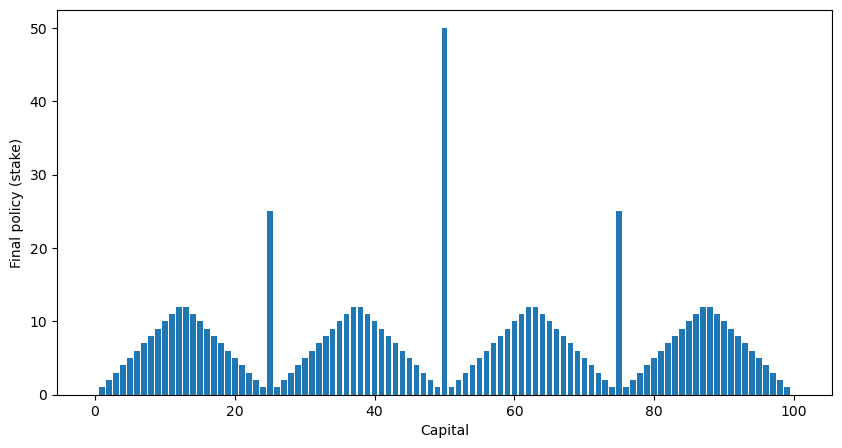

In [38]:
# prefer smaller stakes, when there's practically no difference in value/return
policy, v = value_iteration_for_gamblers(0.25, almost_zero=-1e-5)
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(policy)), np.argmax(policy, axis=1))
plt.xlabel("Capital")
plt.ylabel("Final policy (stake)")
plt.show()

In [40]:
policy, v = value_iteration_for_gamblers(0.55)

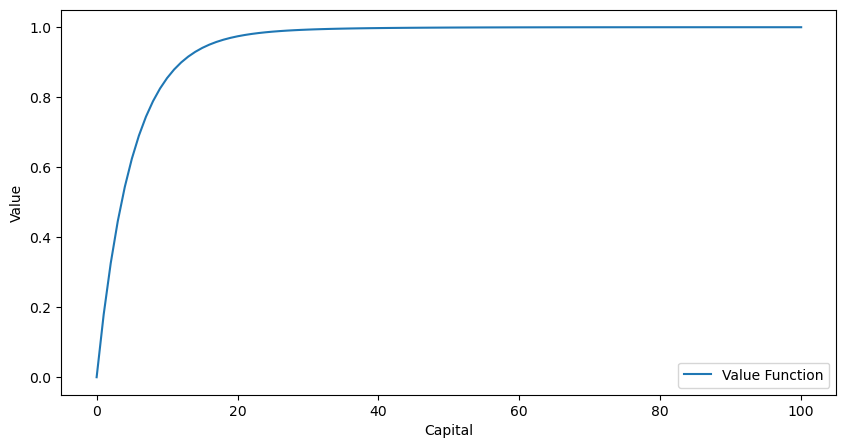

In [41]:
# Plotting Final Values (action stake) vs State (Capital)
# normalize the value with 1 at the end (to make the graph continuous)
v_norm = [0] + list(v[1:100]) + [1]
plt.figure(figsize=(10, 5))
plt.plot(v_norm, label="Value Function")
plt.xlabel("Capital")
plt.ylabel("Value")
plt.legend()

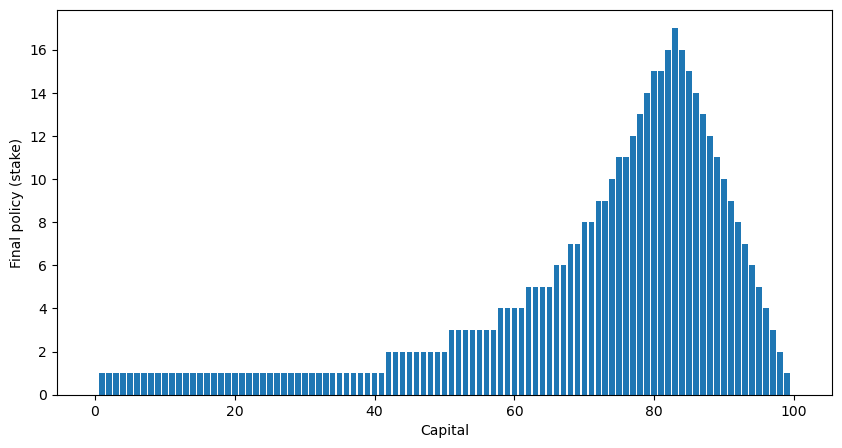

In [42]:
# Plotting Capital vs Final Policy
policy, v = value_iteration_for_gamblers(0.55, almost_zero=1e-5)
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(policy)), np.argmax(policy, axis=1))
plt.xlabel("Capital")
plt.ylabel("Final policy (stake)")
plt.show()

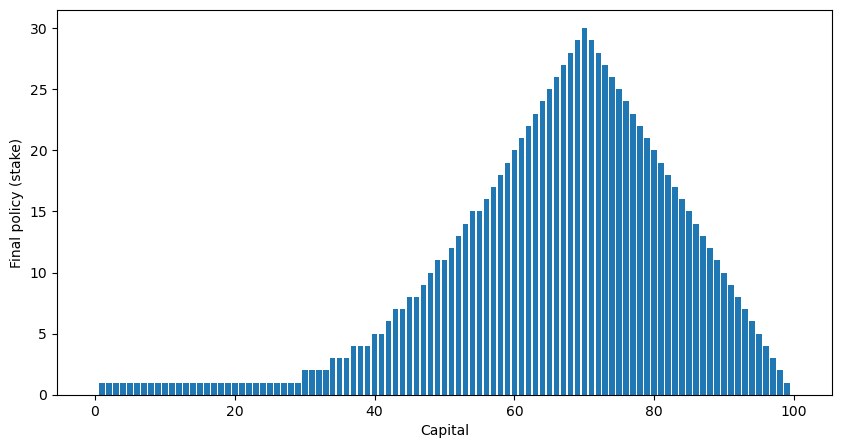

In [45]:
# prefer bigger stakes, when there's practically no difference in value/return
policy, v = value_iteration_for_gamblers(0.55, almost_zero=1e-4)
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(policy)), np.argmax(policy, axis=1))
plt.xlabel("Capital")
plt.ylabel("Final policy (stake)")
plt.show()

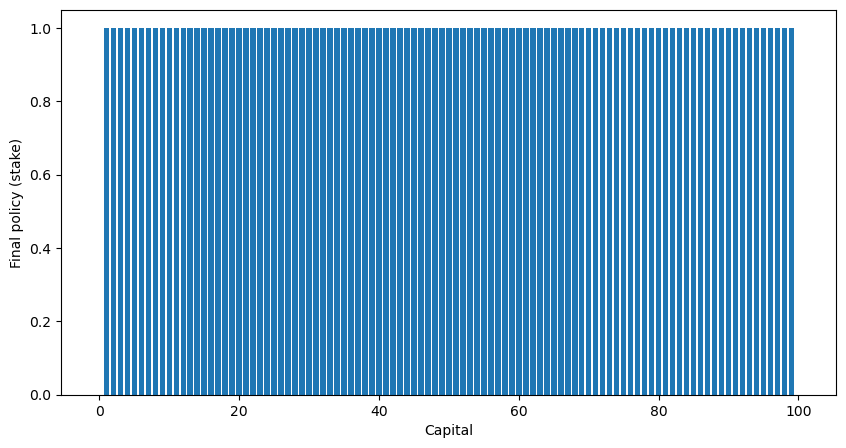

In [47]:
# prefer smaller stakes, when there's practically no difference in value/return
policy, v = value_iteration_for_gamblers(0.55, almost_zero=-1e-4)
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(policy)), np.argmax(policy, axis=1))
plt.xlabel("Capital")
plt.ylabel("Final policy (stake)")
plt.show()